# LAB 2

In [20]:
import scipy
from scipy import stats

## A litle Statistics

### integrating the standard normal distribution

In [29]:
# integral from -inf to 0 (Z=0)
scipy.stats.norm.cdf(0)

0.5

In [30]:
# probability between -inf and 0.3 (Z=0.3)
scipy.stats.norm.cdf(0.3)

0.6179114221889526

In [32]:
# probability between -inf and 0.8 (Z=0.8)
scipy.stats.norm.cdf(0.8)

0.7881446014166034

In [34]:
# prob between -inf and 3 (Z=3)
scipy.stats.norm.cdf(3)

0.9986501019683699

### determine associated sigma values

In [35]:
# sigma for a prob of 0.5 
scipy.stats.norm.ppf(0.5)

0.0

In [36]:
# sigma for prob of 0.84134 (from Z table)
scipy.stats.norm.ppf(0.84134)

0.9999803859660787

In [37]:
# sigma for a prob of 0.00003 [prob from -inf to -4 sigmas]
# this gave a negative sigma, this means the prob/area is to the left of the center, (ie the probability form -inf to a point 4 sigmas to the left of the center)
scipy.stats.norm.ppf(0.00003)

-4.012810811118254

## Continuous analytic distributions (Rayleigh)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import rayleigh


In [3]:
# realization with ~100k samples (random samples)
d = rayleigh.rvs(loc = 3.0, scale = .01, size = 100000)

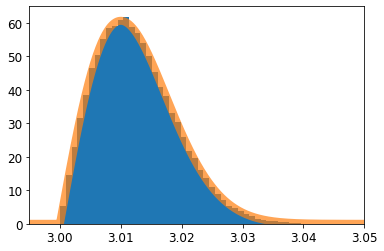

In [4]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([2.995,3.05])
x = np.linspace(2.995,3.05,1000)
ax.plot(x,rayleigh.pdf(x,loc = 3., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()